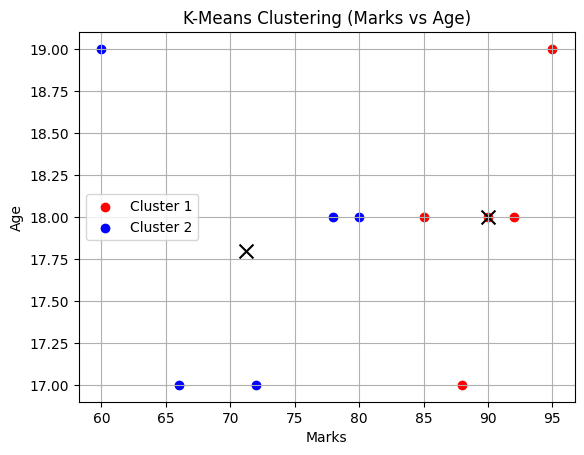

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import csv

data = []
with open('/content/sample_data/sample_dataset(2).csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        # Convert string numbers to int
        row['Marks'] = int(row['Marks'])
        row['Age'] = int(row['Age'])
        row['Gender'] = 0 if row['Gender'] == 'M' else 1
        data.append(row)


# Step 3: Select Features (Marks, Age)
points = []
for d in data:
    points.append([d['Marks'], d['Age']])  # only use Marks and Age

# Step 4: K-Means Clustering (hardcoded)
def euclidean(p1, p2):
    return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

def mean(points):
    n = len(points)
    return [sum(x[0] for x in points) / n, sum(x[1] for x in points) / n]

def k_means(points, k=2, max_iters=100):
    # Randomly initialize centroids
    centroids = random.sample(points, k)

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]

        # Assign each point to the nearest centroid
        for p in points:
            distances = [euclidean(p, c) for c in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(p)

        # Recalculate centroids
        new_centroids = [mean(cluster) if cluster else centroids[i] for i, cluster in enumerate(clusters)]

        # Check for convergence
        if new_centroids == centroids:
            break
        centroids = new_centroids

    return centroids, clusters

centroids, clusters = k_means(points, k=2)

# Step 5: Plot the clusters
colors = ['red', 'blue', 'green']
for i, cluster in enumerate(clusters):
    x = [p[0] for p in cluster]
    y = [p[1] for p in cluster]
    plt.scatter(x, y, color=colors[i], label=f'Cluster {i+1}')

# Plot centroids
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], color='black', marker='x', s=100)

plt.xlabel("Marks")
plt.ylabel("Age")
plt.title("K-Means Clustering (Marks vs Age)")
plt.legend()
plt.grid(True)
plt.show()
